In [37]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import pandas as pd
from datasets import Dataset
import data
import pickle as pkl
import utils

# load unembedding layer
"""
checkpoint = "EleutherAI/gpt-neo-2.7B"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint, output_hidden_states=True)
unembed = utils.get_unembedding(model) # has to compute pseudoinverse
pkl.dump(unembed, open('unembed.pkl', 'wb'))
"""
unembed = pkl.load(open('unembed.pkl', 'rb'))

Text(0.5, 0, 'Epoch')

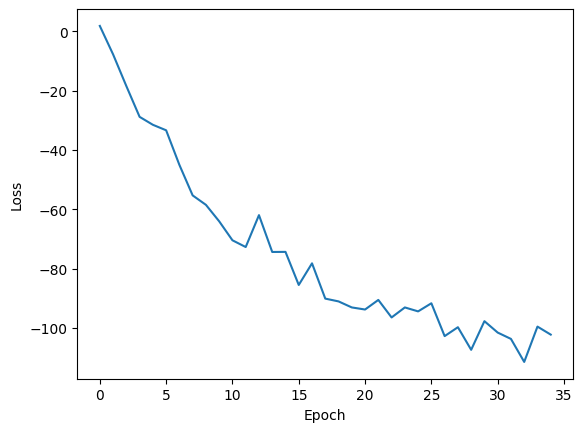

In [35]:
r = pkl.load(open('results/Aug_27_16_33_qtgqgthlqhxg/results.pkl', 'rb'))
embs = r['embs']
plt.plot(r['losses'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Decode embeddings

Load unembedding layer

In [36]:
for i in range(len(embs)): #[::50]:
    unembedded_ids_onehot_soft = unembed(torch.Tensor(embs[i]))
    unembedded_ids = unembedded_ids_onehot_soft.argmax(axis=-1)
    unembedded_ids_top = unembedded_ids_onehot_soft.topk(k=10).indices
    probs = nn.functional.softmax(unembedded_ids_onehot_soft.flatten(), dim=0)
    top_probs = probs.topk(k=10).values.detach().tolist()
    print(repr(tokenizer.decode(unembedded_ids.tolist()[0])))
    print('\ttop probs:', top_probs)
    # print(unembedded_ids_top.tolist())
    print('\tfirst token top-10:', repr(tokenizer.decode(unembedded_ids_top.tolist()[0][0])))

'x the following two numbers: '
	top probs: [3.0686092031828593e-06, 3.0365765724127414e-06, 3.0254252578743035e-06, 3.0029605113668367e-06, 3.0009937290742528e-06, 2.995910563186044e-06, 2.9936038572486723e-06, 2.9582195111288456e-06, 2.957405513370759e-06, 2.954272758870502e-06]
	first token top-10: 'x xxesX×xsxexpxc X'
'x the following two numbers: '
	top probs: [3.0717235404154053e-06, 3.0414778393605957e-06, 3.0272797175712185e-06, 3.0047362997720484e-06, 3.000041715495172e-06, 2.9956811431475217e-06, 2.992077497765422e-06, 2.955564468720695e-06, 2.9554221327998675e-06, 2.9552072646765737e-06]
	first token top-10: 'x xxesX×xsxexcxp X'
'x the following two numbers: '
	top probs: [3.070412276429124e-06, 3.044995992240729e-06, 3.0271633022493916e-06, 3.0056839932512958e-06, 3.001317054440733e-06, 2.9954733236081665e-06, 2.9921322948212037e-06, 2.956200660264585e-06, 2.955422814920894e-06, 2.954144065370201e-06]
	first token top-10: 'x xxesX×xsxpxexc X'
'x the following two numbers: '

**Compare embedding similarity of first word to "add"**

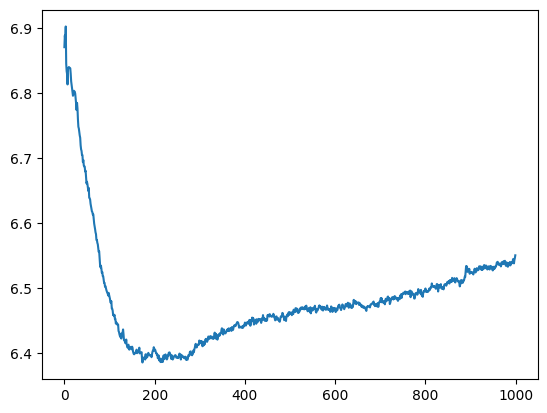

In [9]:
input_add = tokenizer(['sum'], return_tensors="pt")['input_ids']
emb_add = model._modules['transformer'].wte(input_add[0]).squeeze()
embs_all = torch.Tensor(embs)[:, 0, 0]
plt.plot((embs_all @ emb_add).detach().tolist())